Pruebas - Segmentación

#####Alumna Farinazzo Analia 24994389@ifts24.edu.ar

In [1]:
#Importo las librerías más comunes para el manejo de imágenes.  Puede que no todas tengan uso posterior.

import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from PIL import Image

In [2]:
# Para poder probar las sentencias de Muestreo, igualmente tengo que cargar una imagen.
# Utilizaremos la opción de tomarla desde un drive propio.


# Tomar y mostrar una imagen disponible en un drive.

# Conecto el Drive donde tengo alojada la imagen
from google.colab import drive
import os

# Monto el drive (conecto el drive con el colab)
drive.mount("/content/drive/", force_remount=True)
#fuerzo el remount por si ejecuto varias veces y ya estaba montado.

# Cambio el directorio para posicionarme donde están las imágenes.
os.chdir('/content/drive/MyDrive/EntregaTPProcesamientoImg/ImagenesPrueba/')

Mounted at /content/drive/


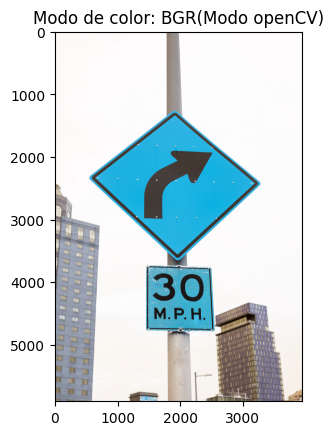

In [3]:
#Tomo y "leo" la imagen elegida desde el drive.  Decido continuar con la de la ceñal de tránsito con la ciudad de fondo.
city1 = imread('Señal_Ciudad.jpg')  ### Ojo!  Es sensible de Mayúsculas y Minúsculas (colab corre en un entorno unix)

#La mostramos con los colores invertidos porque plt utiliza RGB y cv2 BGR
plt.title("Modo de color: BGR(Modo openCV)")
plt.imshow(city1)
plt.show()


La segmentación es el proceso de dividir una imagen en regiones o segmentos que corresponden a diferentes objetos o partes de objetos. El objetivo es simplificar la representación de la imagen, haciéndola más fácil de analizar.

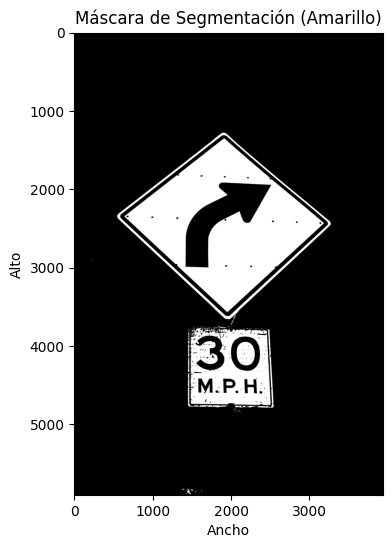

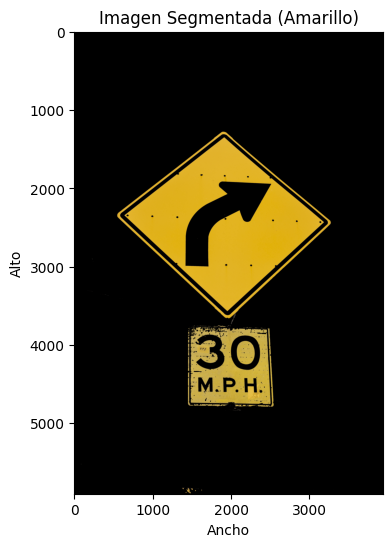

In [4]:
# Definir los rangos de umbral para el color amarillo (en BGR)
# Estos valores son aproximados y necesitarás ajustarlos según tu imagen específica.
lower_yellow_bgr = np.array([0, 100, 100], dtype=np.uint8)  # Bajos en azul, altos en verde y rojo
upper_yellow_bgr = np.array([100, 255, 255], dtype=np.uint8) # Algo de azul permitido, altos en verde y rojo

# Crear una máscara booleana para los píxeles dentro del rango amarillo
mask_yellow = cv2.inRange(city1, lower_yellow_bgr, upper_yellow_bgr)

# La máscara es una imagen en escala de grises donde los píxeles amarillos son blancos (255)
# y el resto son negros (0).

# Visualizar la máscara
plt.figure(figsize=(8, 6))
plt.imshow(mask_yellow, cmap='gray')
plt.title('Máscara de Segmentación (Amarillo)')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

# Puedes combinar la máscara con la imagen original para ver la segmentación
imagen_segmentada = cv2.bitwise_and(city1, city1, mask=mask_yellow)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(imagen_segmentada, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada (Amarillo)')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

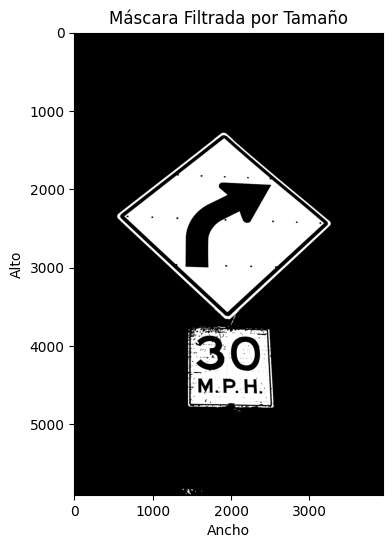

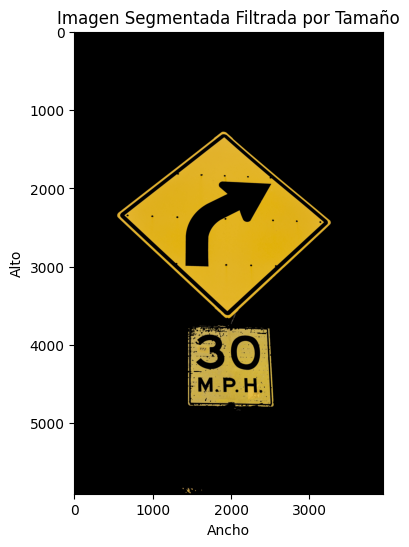

In [8]:
#Vamos a intentar depurar la segmentación, buscando por sectores donde las zonas que buscamos sean de cierto tamaño.
#La idea es eleiminar el ruido que tenemos sobre todo en la esquina superior izquierda del cuadro que indica la velocidad máxima por milla
#tomar la curva a la derecha.

# Encontrar los componentes conectados
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask_yellow, connectivity=8)

# Obtener las áreas de los componentes (el componente 0 es el fondo)
areas = stats[1:, cv2.CC_STAT_AREA]
component_labels = np.arange(1, num_labels)

# Definir un umbral de tamaño mínimo para la señal principal
umbral_area = 50  # Ajusta este valor según el tamaño esperado de tu señal

# Crear una nueva máscara donde solo los componentes grandes permanecen blancos
mask_filtrada = np.zeros_like(mask_yellow, dtype=np.uint8)
for label in component_labels:
    if areas[label - 1] >= umbral_area:
        mask_filtrada[labels == label] = 255

# Visualizar la máscara filtrada
plt.figure(figsize=(8, 6))
plt.imshow(mask_filtrada, cmap='gray')
plt.title('Máscara Filtrada por Tamaño')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

# Aplicar la máscara filtrada a la imagen original
imagen_segmentada_filtrada = cv2.bitwise_and(city1, city1, mask=mask_filtrada)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(imagen_segmentada_filtrada, cv2.COLOR_BGR2RGB))
plt.title('Imagen Segmentada Filtrada por Tamaño')
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.show()

Inconcluso, deberemos buscar otros métodos para eliminar ruidos de la imagen, dado que el utilizado no es significativo.

In [10]:
print(city1.shape)

(5899, 3938, 3)
